# Understand the dataset

In [301]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [302]:
#Import and read the dataset

bike_dataset = pd.read_csv("Bike Sharing Dataset.csv")
bike_dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [303]:
# Check the number of cells and columns 

bike_dataset.shape

(730, 16)

In [304]:
# Check the data-type and null values

bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [305]:
# check the statistics of columns

bike_dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [306]:
# Check for duplicate values in dataset

bike_dataset_dup = bike_dataset.copy()
bike_dataset_dup.shape

(730, 16)

In [307]:
# Drop duplicate values

bike_dataset_dup.drop_duplicates(inplace = True)
bike_dataset_dup.shape

(730, 16)

In [308]:
# Drop instant, dteday, casual and registered columns as:
# instant does not serve any purpose, as it has only index for the row
# dteday column has date which can be compensated by year and month column
# casual and registered is sub-category for cnt column


bike_dataset.drop(['instant','dteday','casual','registered'],axis=1,inplace=True) 

In [309]:
# Rename the columns for better understanding and readability

bike_dataset.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [310]:
# check for column headers

bike_dataset.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [311]:
# Encoding the below mentioned columns for converting their binary numbers into meaningful categories.
# SEASON, YEAR, MONTH, HOLIDAY, WEEKDAY, WORKINGDAY, and WEATHERSIT

# This would change the dtype to object too.

In [312]:
bike_dataset['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

In [313]:
bike_dataset['year'].replace({0:'2018',1:'2019'},inplace=True)

In [314]:
bike_dataset['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                               7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [315]:
bike_dataset['holiday'].replace({0:'No_Holiday',1:'Holiday'},inplace=True)

In [316]:
bike_dataset['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)

In [317]:
bike_dataset['workingday'].replace({0:'Yes_w_day',1:'No_w_day'},inplace=True)

In [318]:
bike_dataset['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

In [319]:
# check and verify the changes

bike_dataset

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,Jan,No_Holiday,Tue,No_w_day,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No_Holiday,Wed,No_w_day,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No_Holiday,Thurs,No_w_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No_Holiday,Fri,No_w_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No_Holiday,Sat,No_w_day,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,No_Holiday,Sat,No_w_day,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,Dec,No_Holiday,Sun,Yes_w_day,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,Dec,No_Holiday,Mon,Yes_w_day,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,Dec,No_Holiday,Tue,No_w_day,Clear,10.489153,11.58500,48.3333,23.500518,1796


# Exploratory Data Analysis/ Data Visualization

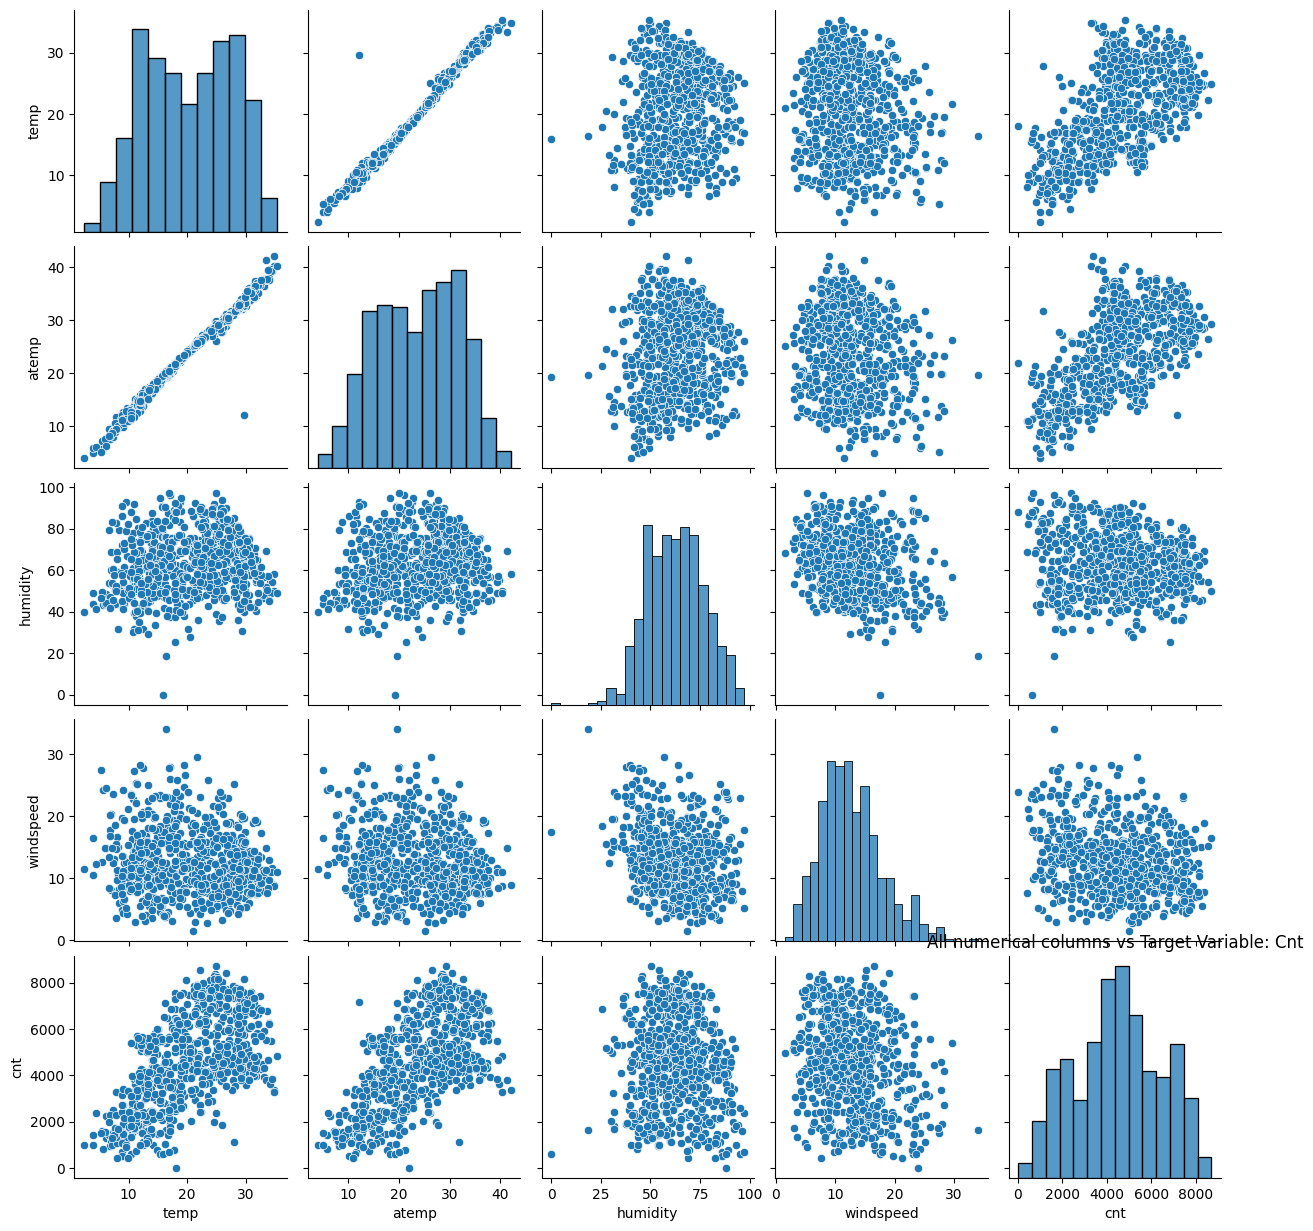

In [320]:
# Scatter Plot of all the numerical variable against our target variable 'cnt'

sns.pairplot(data=bike_dataset, vars=["temp", "atemp", "humidity",'windspeed','cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

Text(0.5, 1.0, 'Count of Passengers throughout Various seasons')

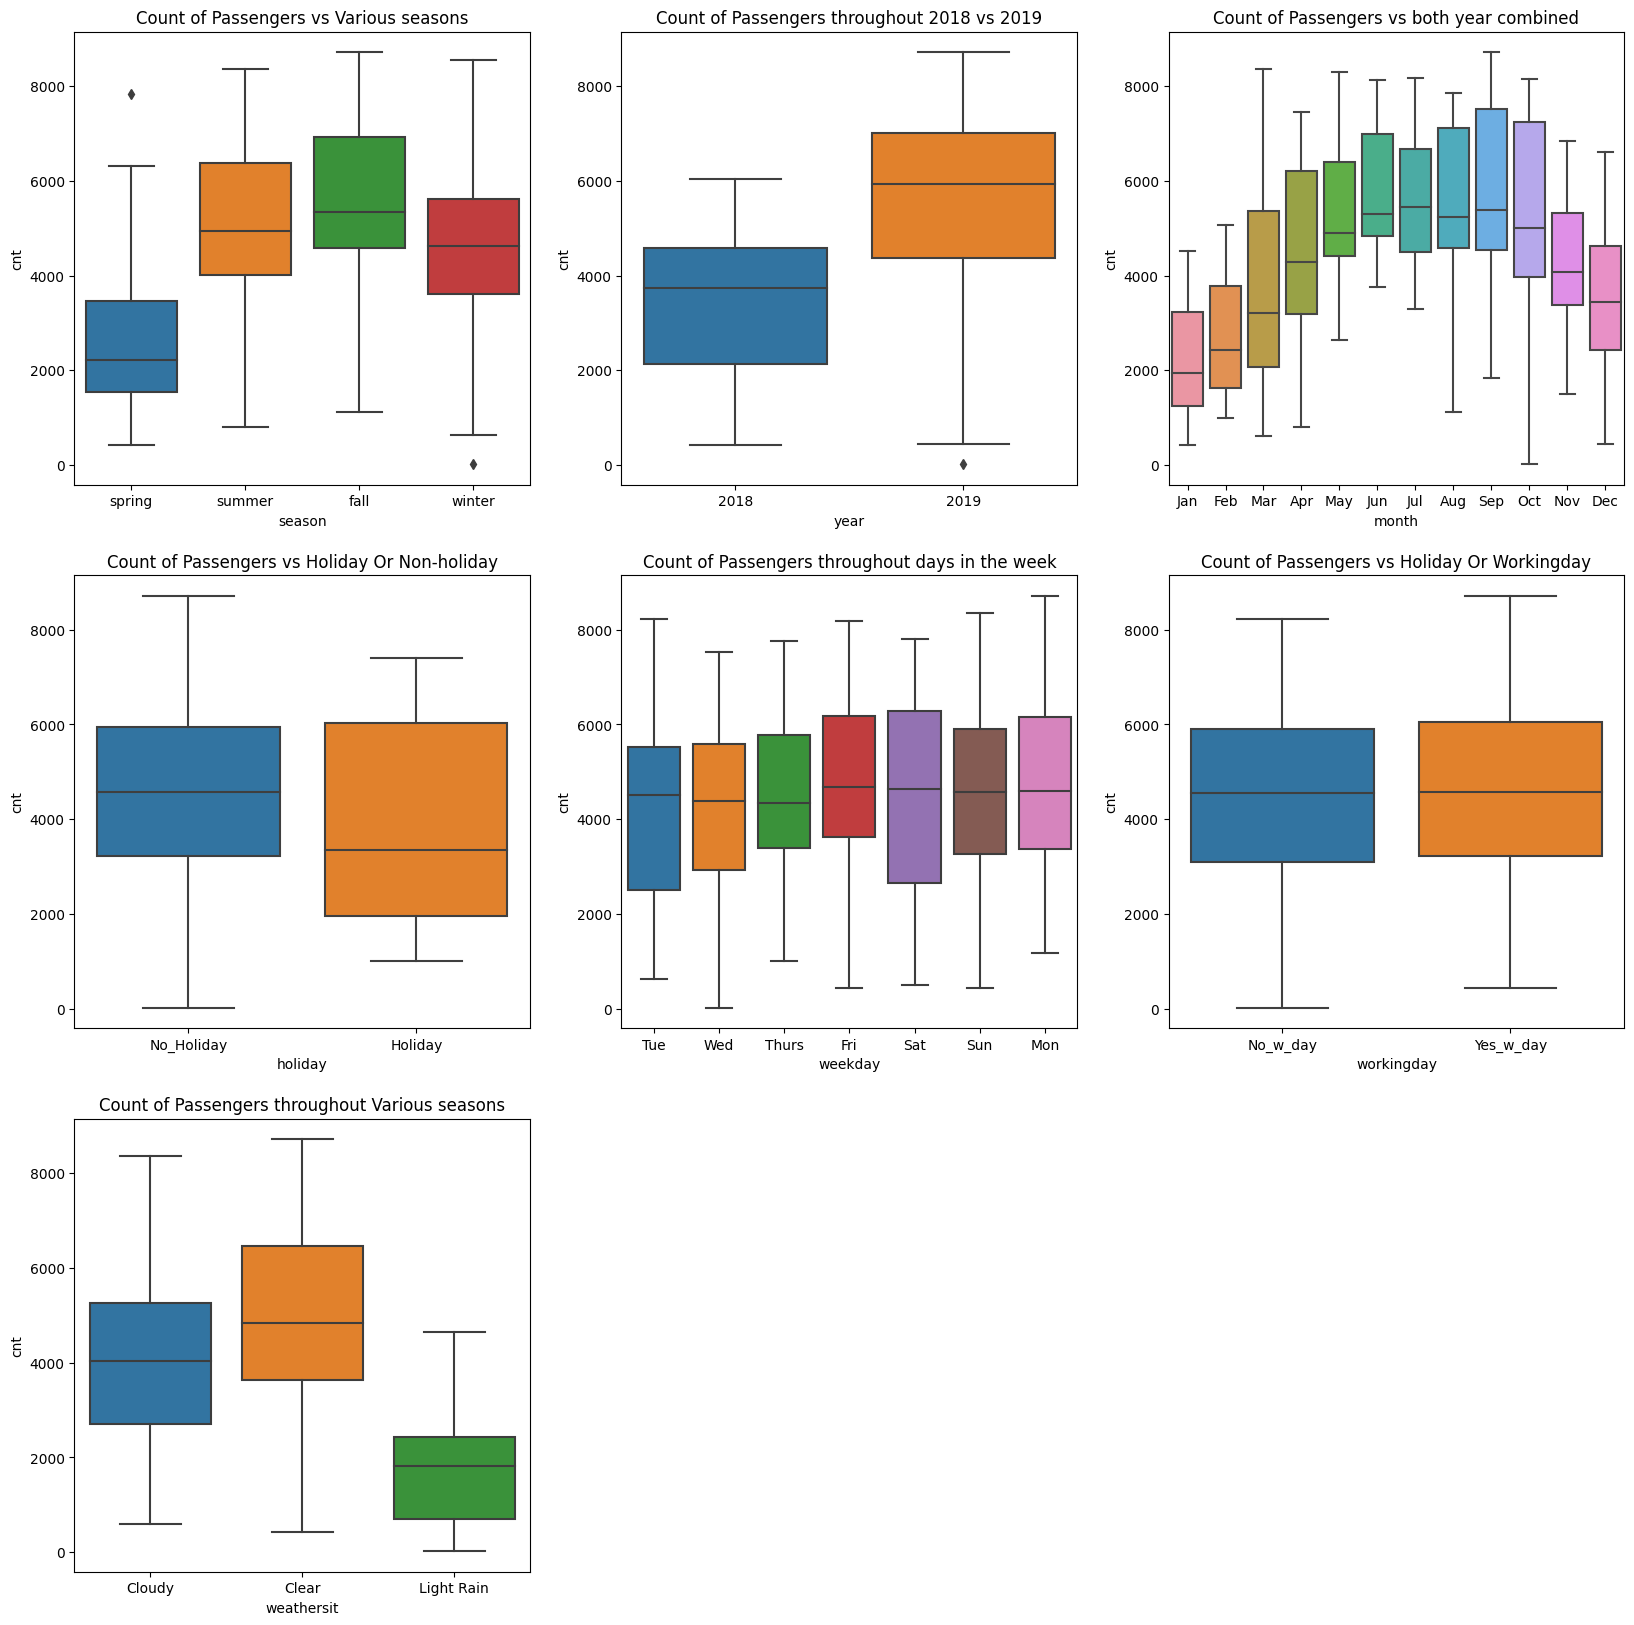

In [321]:
# Box Plot of all the categorical variable against our target variable 'cnt'


plt.figure(figsize = (20,20))
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data = bike_dataset).set_title('Count of Passengers vs Various seasons')

plt.subplot(3, 3, 2)
sns.boxplot(x='year', y='cnt', data = bike_dataset).set_title('Count of Passengers throughout 2018 vs 2019')

plt.subplot(3, 3, 3)
sns.boxplot(x='month', y='cnt', data = bike_dataset).set_title('Count of Passengers vs both year combined')

plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y='cnt', data = bike_dataset).set_title('Count of Passengers vs Holiday Or Non-holiday')

plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data = bike_dataset).set_title('Count of Passengers throughout days in the week')

plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data = bike_dataset).set_title('Count of Passengers vs Holiday Or Workingday')

plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data = bike_dataset).set_title('Count of Passengers throughout Various seasons')

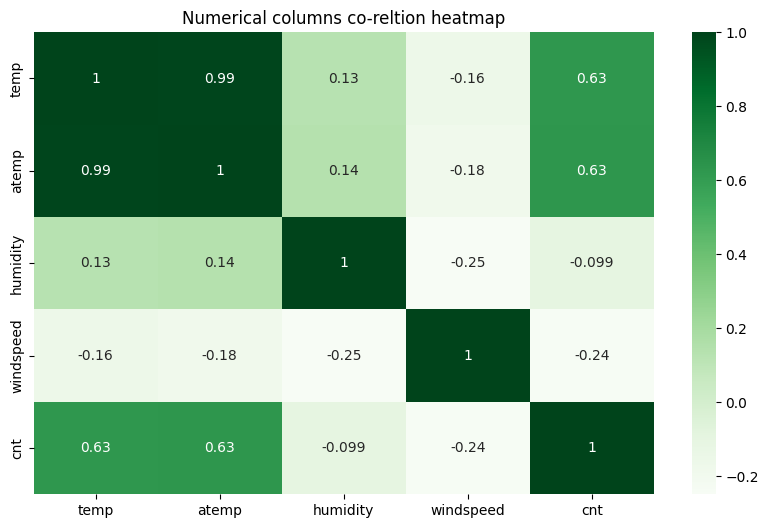

In [322]:
# Heatmap of all numberical variables against each other to check their co-relations

plt.figure(figsize=(10,6))
sns.heatmap(bike_dataset.corr(),annot=True,cmap='Greens')
plt.title("Numerical columns co-reltion heatmap")
plt.show()

# Data Preparation

In [323]:
# Create dummy variables for all categorical variables with drop_first so that machine can use k-1 columns of data

dummy_bike_dataset = pd.get_dummies(bike_dataset[['year','holiday','workingday','season','month','weekday','weathersit']], drop_first = True)
dummy_bike_dataset.head()

,year_2019,holiday_No_Holiday,workingday_Yes_w_day,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [324]:
# Concatinate the original dataset with dummy dataset

new_bike_dataset=pd.concat([bike_dataset,dummy_bike_dataset],axis=1)
new_bike_dataset.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No_Holiday,Tue,No_w_day,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,1,0
1,spring,2018,Jan,No_Holiday,Wed,No_w_day,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,1,1,0
2,spring,2018,Jan,No_Holiday,Thurs,No_w_day,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,spring,2018,Jan,No_Holiday,Fri,No_w_day,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,spring,2018,Jan,No_Holiday,Sat,No_w_day,Clear,9.305237,11.46350,43.6957,...,0,0,0,1,0,0,0,0,0,0


In [325]:
# Drop the individual columns as columns for their dummy variables have already been created

new_bike_dataset=new_bike_dataset.drop(['season','year','holiday','month','workingday','weekday','weathersit'],axis=1)
new_bike_dataset.head()

,temp,atemp,humidity,windspeed,cnt,year_2019,holiday_No_Holiday,workingday_Yes_w_day,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [326]:
# Split the data into train and test and check their shape

df_train,df_test=train_test_split(new_bike_dataset,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [327]:
# Create an object to be scaled

scaler=MinMaxScaler()

In [328]:
# Make the list of numerical variable need to be scaled

var_scale=['temp','atemp','humidity','windspeed','cnt']

#Scaled the created list's variables between 0-1

df_train[var_scale]=scaler.fit_transform(df_train[var_scale]) 
df_train.head()

,temp,atemp,humidity,windspeed,cnt,year_2019,holiday_No_Holiday,workingday_Yes_w_day,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,0.815169,0.766351,0.725633,0.264686,0.827658,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,1,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0


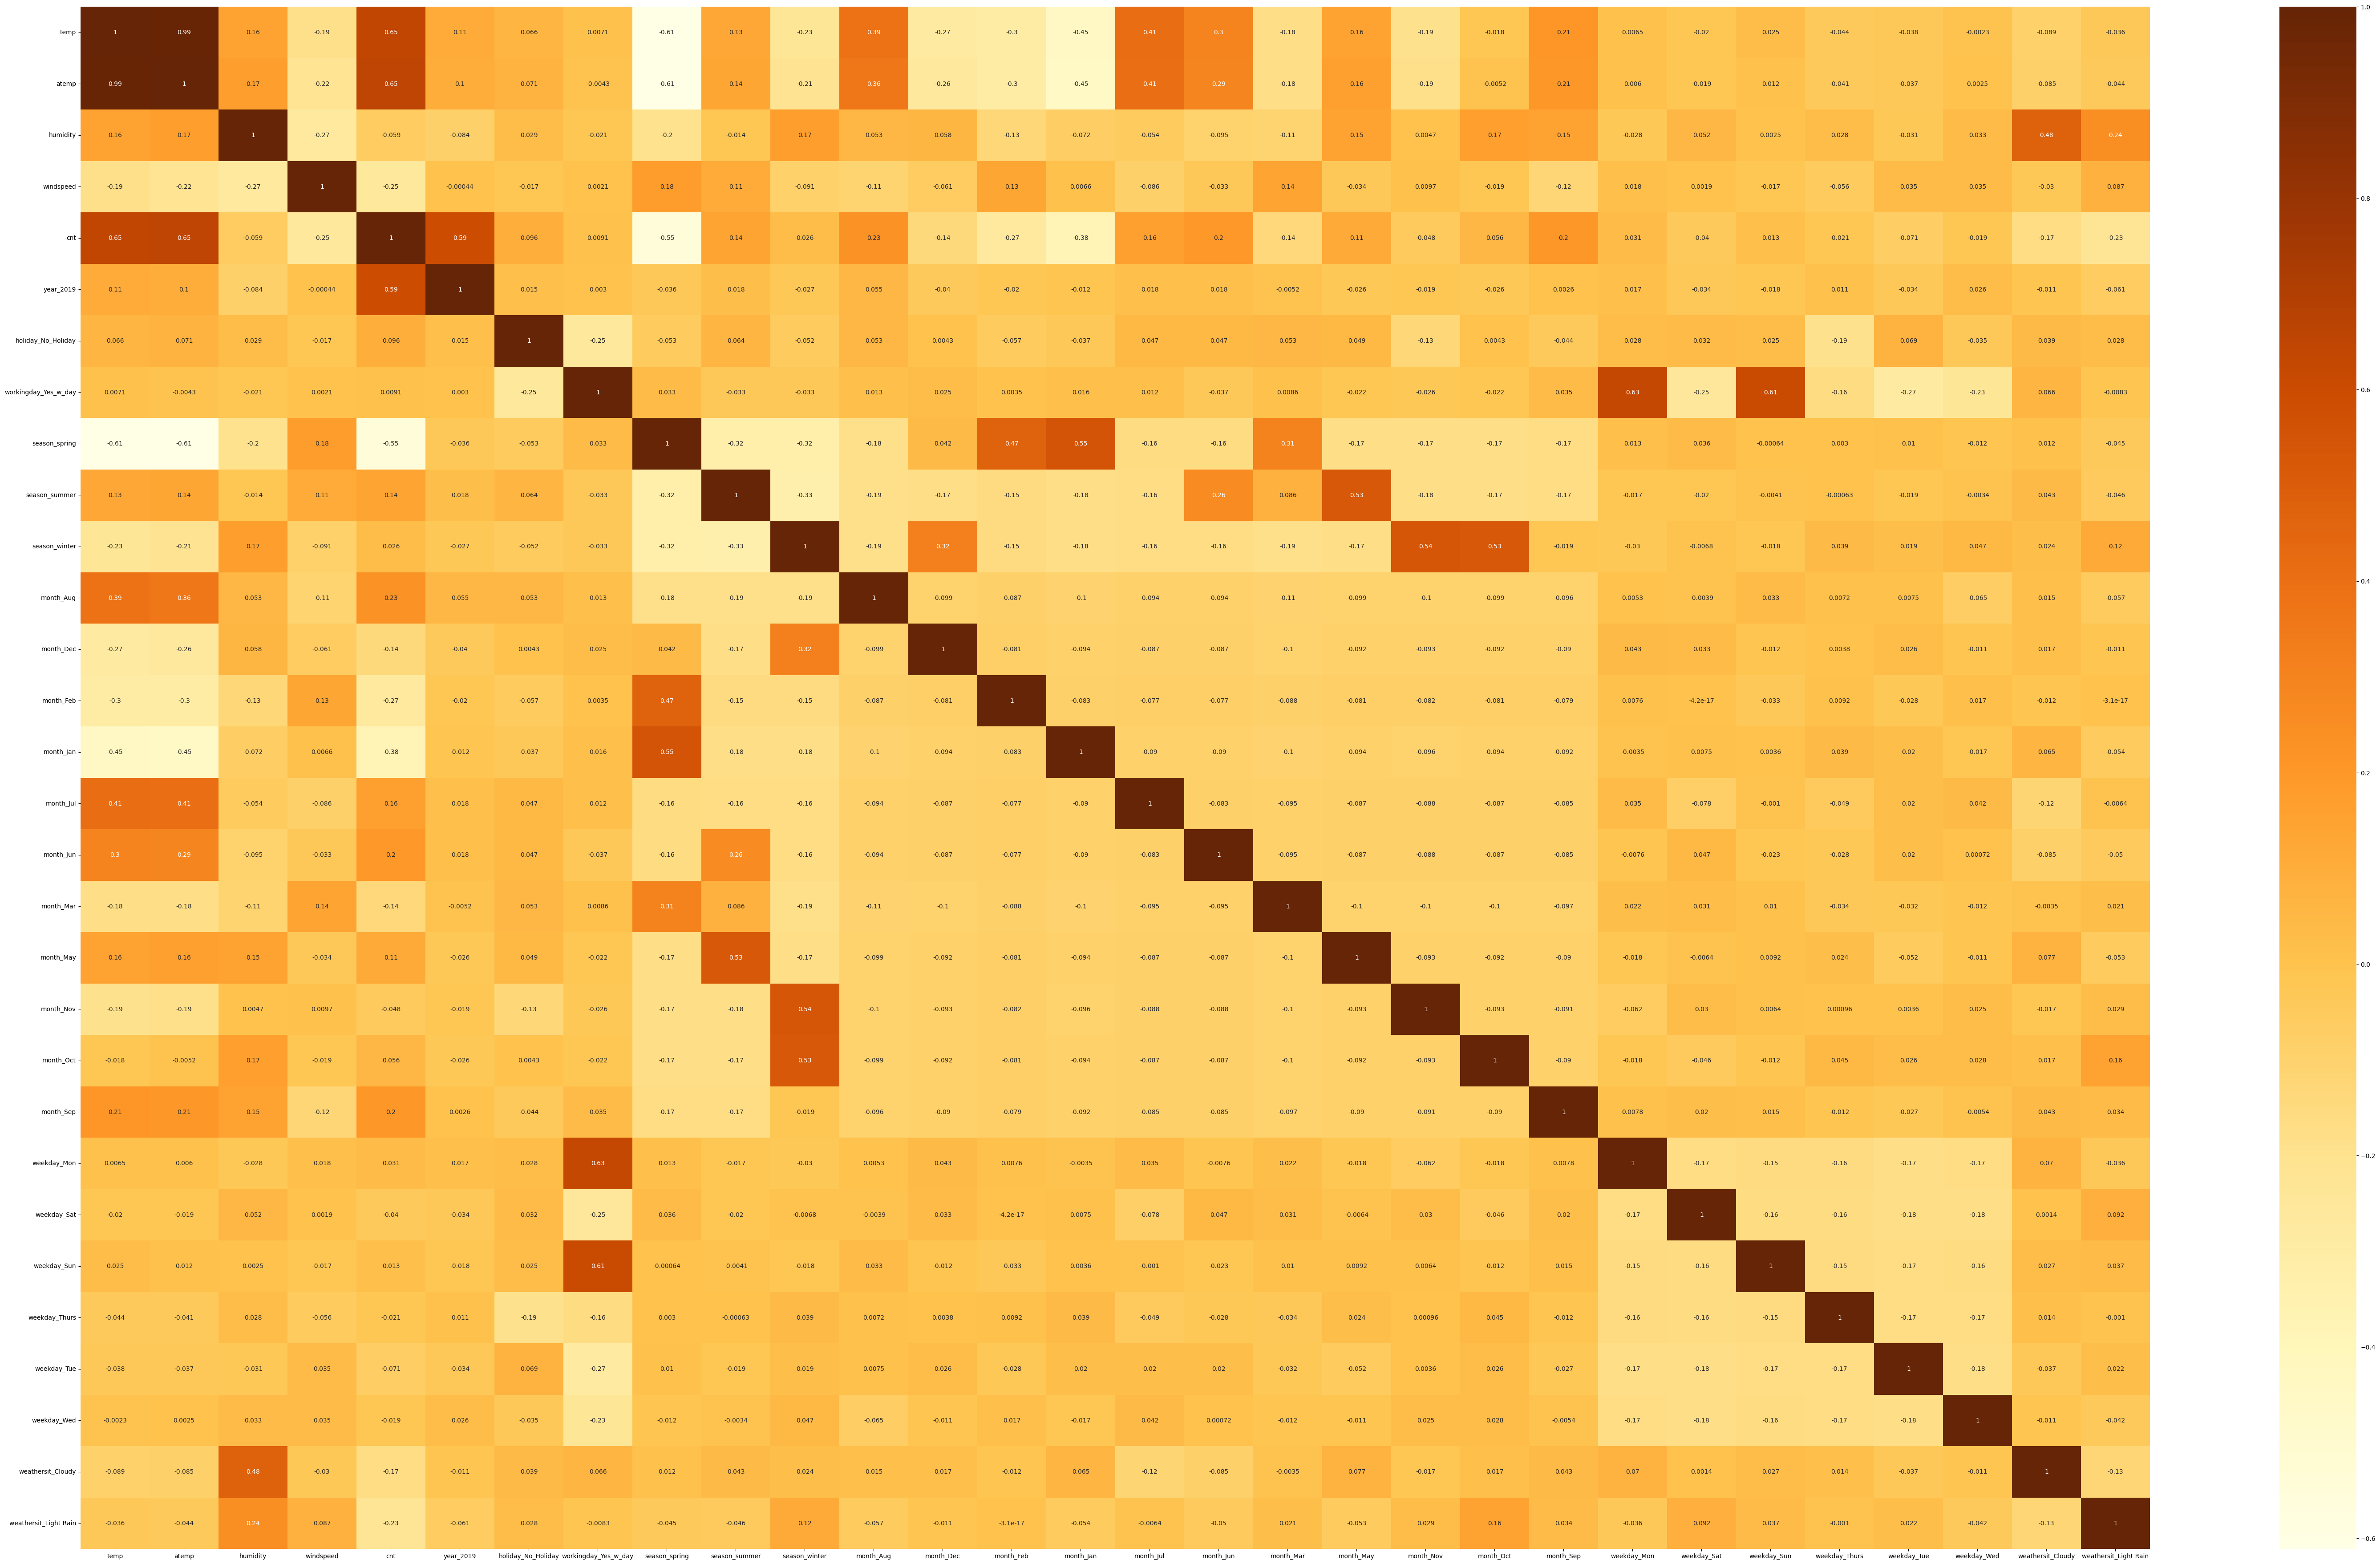

In [329]:
# Plot heatmap the co-relation graph to check the co-relation between dummy variables

plt.figure(figsize=(75,45))
sns.heatmap(df_train.corr(),annot=True,cmap='YlOrBr')
plt.show()

In [330]:
#Split the df_train into y_train and X_train for building model

y_train = df_train.pop('cnt')
X_train = df_train

# Model Building

In [331]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,step=20)
rfe = rfe.fit(X_train, y_train)

In [332]:
# List of variables selected in top 20 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('year_2019', True, 1),
 ('holiday_No_Holiday', True, 1),
 ('workingday_Yes_w_day', True, 1),
 ('season_spring', False, 2),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('month_Aug', False, 2),
 ('month_Dec', False, 2),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', False, 2),
 ('month_Jun', False, 2),
 ('month_Mar', False, 2),
 ('month_May', False, 2),
 ('month_Nov', False, 2),
 ('month_Oct', False, 2),
 ('month_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 2),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 2),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Rain', True, 1)]

In [333]:
# Checking which columns have been selected

X_col = X_train.columns[rfe.support_]
X_col

Index(['temp', 'atemp', 'humidity', 'windspeed', 'year_2019',
       'holiday_No_Holiday', 'workingday_Yes_w_day', 'season_winter',
       'month_Jan', 'month_Sep', 'weekday_Mon', 'weekday_Sun',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

In [334]:
# Checking which columns have been rejected

X_train.columns[~rfe.support_]

Index(['season_spring', 'season_summer', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'weekday_Sat', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

In [335]:
# Creating dataframe with RFE selected variables

X_train_rfe = X_train[X_col]

In [336]:
# Building 1st linear regression model


X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const                    0.120729
temp                     0.420145
atemp                    0.122740
humidity                -0.145811
windspeed               -0.172815
year_2019                0.230895
holiday_No_Holiday       0.136602
workingday_Yes_w_day     0.043152
season_winter            0.094960
month_Jan               -0.076227
month_Sep                0.078173
weekday_Mon             -0.025579
weekday_Sun             -0.027692
weathersit_Cloudy       -0.049929
weathersit_Light Rain   -0.245679
dtype: float64

In [337]:
# OLS Regression Summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     160.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          7.63e-174
Time:                        12:46:44   Log-Likelihood:                 475.75
No. Observations:                 510   AIC:                            -921.5
Df Residuals:                     495   BIC:                            -858.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1207      0.075      1.604      0.109      -0.027       0.269
temp                      0.4201      0.137      3.078      0.002       0.152       0.688
atemp                     0.1227      0.145      0.844      0.399      -0.163       0.409
humidity                 -0.1458      0.040     -3.620      0.000      -0.225      -0.067
windspeed                -0.1728      0.028     -6.199      0.000      -0.228      -0.118
year_2019                 0.2309      0.009     26.515      0.000       0.214       0.248
holiday_No_Holiday        0.1366      0.070      1.959      0.051      -0.000       0.274
workingday_Yes_w_day      0.0432      0.076      0.570      0.569      -0.106       0.192
season_winter             0.0950      0.011      8.344      0.000       0.073       0.117
month_Jan                -0.0762      0.018     -4.208      0.000      -0.112      -0.041
month_Sep                 0.0782      0.016      4.799      0.000       0.046       0.110
weekday_Mon              -0.0256      0.076     -0.339      0.735      -0.174       0.123
weekday_Sun              -0.0277      0.076     -0.367      0.714      -0.176       0.121
weathersit_Cloudy        -0.0499      0.011     -4.434      0.000      -0.072      -0.028
weathersit_Light Rain    -0.2457      0.028     -8.690      0.000      -0.301      -0.190
==============================================================================
Omnibus:                       52.091   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.569
Skew:                          -0.628   Prob(JB):                     1.77e-21
Kurtosis:                       4.709   Cond. No.                         88.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
# Check the VIF of all the variables

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) 
              for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,356.26
0,temp,345.82
5,holiday_No_Holiday,42.16
2,humidity,36.64
6,workingday_Yes_w_day,25.65
10,weekday_Mon,13.39
11,weekday_Sun,12.66
3,windspeed,5.19
12,weathersit_Cloudy,2.33
4,year_2019,2.10


In [339]:
# As 'atemp' shows very-high VIF and high p-value hence we can drop it

X = X_train_rfe.drop('atemp', axis =1)

# Building 2nd linear regression model

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const                    0.122166
temp                     0.533404
humidity                -0.143580
windspeed               -0.176841
year_2019                0.230854
holiday_No_Holiday       0.137352
workingday_Yes_w_day     0.042880
season_winter            0.095754
month_Jan               -0.077083
month_Sep                0.077981
weekday_Mon             -0.025414
weekday_Sun             -0.028409
weathersit_Cloudy       -0.050203
weathersit_Light Rain   -0.247532
dtype: float64

In [340]:
# OLS Regression Summary

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.09e-175
Time:                        12:46:45   Log-Likelihood:                 475.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     496   BIC:                            -863.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1222      0.075      1.624      0.105      -0.026       0.270
temp                      0.5334      0.025     21.509      0.000       0.485       0.582
humidity                 -0.1436      0.040     -3.574      0.000      -0.223      -0.065
windspeed                -0.1768      0.027     -6.440      0.000      -0.231      -0.123
year_2019                 0.2309      0.009     26.518      0.000       0.214       0.248
holiday_No_Holiday        0.1374      0.070      1.970      0.049       0.000       0.274
workingday_Yes_w_day      0.0429      0.076      0.566      0.572      -0.106       0.192
season_winter             0.0958      0.011      8.445      0.000       0.073       0.118
month_Jan                -0.0771      0.018     -4.263      0.000      -0.113      -0.042
month_Sep                 0.0780      0.016      4.789      0.000       0.046       0.110
weekday_Mon              -0.0254      0.076     -0.337      0.737      -0.174       0.123
weekday_Sun              -0.0284      0.076     -0.376      0.707      -0.177       0.120
weathersit_Cloudy        -0.0502      0.011     -4.462      0.000      -0.072      -0.028
weathersit_Light Rain    -0.2475      0.028     -8.785      0.000      -0.303      -0.192
==============================================================================
Omnibus:                       50.178   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.919
Skew:                          -0.609   Prob(JB):                     1.10e-20
Kurtosis:                       4.686   Cond. No.                         69.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
# Check the VIF of all the variables

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
4,holiday_No_Holiday,41.87
1,humidity,36.44
5,workingday_Yes_w_day,25.63
9,weekday_Mon,13.38
10,weekday_Sun,12.63
0,temp,11.22
2,windspeed,5.04
11,weathersit_Cloudy,2.33
3,year_2019,2.10
6,season_winter,1.69


In [342]:
# As 'workingday_Yes_w_day' shows high VIF and p-value hence we can drop it

X = X.drop('workingday_Yes_w_day', axis =1)


# Building 3rd linear regression model

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const                    0.158214
temp                     0.533212
humidity                -0.142613
windspeed               -0.177281
year_2019                0.231185
holiday_No_Holiday       0.101048
season_winter            0.095096
month_Jan               -0.076945
month_Sep                0.078256
weekday_Mon              0.016726
weekday_Sun              0.013707
weathersit_Cloudy       -0.050123
weathersit_Light Rain   -0.247425
dtype: float64

In [343]:
# OLS Regression Summary

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     187.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          6.78e-176
Time:                        12:46:46   Log-Likelihood:                 475.22
No. Observations:                 510   AIC:                            -924.4
Df Residuals:                     497   BIC:                            -869.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1582      0.040      3.951      0.000       0.080       0.237
temp                      0.5332      0.025     21.518      0.000       0.485       0.582
humidity                 -0.1426      0.040     -3.555      0.000      -0.221      -0.064
windspeed                -0.1773      0.027     -6.463      0.000      -0.231      -0.123
year_2019                 0.2312      0.009     26.635      0.000       0.214       0.248
holiday_No_Holiday        0.1010      0.027      3.696      0.000       0.047       0.155
season_winter             0.0951      0.011      8.438      0.000       0.073       0.117
month_Jan                -0.0769      0.018     -4.258      0.000      -0.112      -0.041
month_Sep                 0.0783      0.016      4.812      0.000       0.046       0.110
weekday_Mon               0.0167      0.013      1.322      0.187      -0.008       0.042
weekday_Sun               0.0137      0.013      1.059      0.290      -0.012       0.039
weathersit_Cloudy        -0.0501      0.011     -4.458      0.000      -0.072      -0.028
weathersit_Light Rain    -0.2474      0.028     -8.787      0.000      -0.303      -0.192
==============================================================================
Omnibus:                       50.043   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.936
Skew:                          -0.610   Prob(JB):                     1.79e-20
Kurtosis:                       4.671   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
# Check the VIF of all the variables

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
1,humidity,26.57
4,holiday_No_Holiday,22.71
0,temp,10.83
2,windspeed,4.27
10,weathersit_Cloudy,2.21
3,year_2019,2.06
5,season_winter,1.68
6,month_Jan,1.49
11,weathersit_Light Rain,1.21
8,weekday_Mon,1.20


In [345]:
# As 'weekday_Sun' shows high p-value and low VIF hence we can drop it

X = X.drop('weekday_Sun', axis =1)

# Building 4th linear regression model

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const                    0.160545
temp                     0.534162
humidity                -0.144905
windspeed               -0.177991
year_2019                0.230983
holiday_No_Holiday       0.101766
season_winter            0.095026
month_Jan               -0.076662
month_Sep                0.078448
weekday_Mon              0.014591
weathersit_Cloudy       -0.049330
weathersit_Light Rain   -0.245729
dtype: float64

In [346]:
# OLS Regression Summary

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.08e-177
Time:                        12:46:47   Log-Likelihood:                 474.65
No. Observations:                 510   AIC:                            -925.3
Df Residuals:                     498   BIC:                            -874.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1605      0.040      4.015      0.000       0.082       0.239
temp                      0.5342      0.025     21.568      0.000       0.486       0.583
humidity                 -0.1449      0.040     -3.617      0.000      -0.224      -0.066
windspeed                -0.1780      0.027     -6.490      0.000      -0.232      -0.124
year_2019                 0.2310      0.009     26.615      0.000       0.214       0.248
holiday_No_Holiday        0.1018      0.027      3.723      0.000       0.048       0.155
season_winter             0.0950      0.011      8.431      0.000       0.073       0.117
month_Jan                -0.0767      0.018     -4.243      0.000      -0.112      -0.041
month_Sep                 0.0784      0.016      4.823      0.000       0.046       0.110
weekday_Mon               0.0146      0.012      1.168      0.244      -0.010       0.039
weathersit_Cloudy        -0.0493      0.011     -4.397      0.000      -0.071      -0.027
weathersit_Light Rain    -0.2457      0.028     -8.740      0.000      -0.301      -0.190
==============================================================================
Omnibus:                       49.542   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.075
Skew:                          -0.593   Prob(JB):                     6.15e-21
Kurtosis:                       4.724   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [347]:
# Check the VIF of all the variables

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
1,humidity,26.55
4,holiday_No_Holiday,22.56
0,temp,10.80
2,windspeed,4.27
9,weathersit_Cloudy,2.21
3,year_2019,2.06
5,season_winter,1.68
6,month_Jan,1.49
10,weathersit_Light Rain,1.20
8,weekday_Mon,1.17


In [348]:
# As 'weekday_Mon' shows high p-value and low VIF hence we can drop it

X = X.drop('weekday_Mon', axis =1)

# Building 5th linear regression model

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const                    0.162987
temp                     0.534547
humidity                -0.147751
windspeed               -0.177894
year_2019                0.231064
holiday_No_Holiday       0.102554
season_winter            0.094862
month_Jan               -0.076828
month_Sep                0.078676
weathersit_Cloudy       -0.048160
weathersit_Light Rain   -0.245748
dtype: float64

In [349]:
# OLS Regression Summary

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.03e-177
Time:                        12:46:48   Log-Likelihood:                 473.95
No. Observations:                 510   AIC:                            -925.9
Df Residuals:                     499   BIC:                            -879.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1630      0.040      4.080      0.000       0.085       0.241
temp                      0.5345      0.025     21.578      0.000       0.486       0.583
humidity                 -0.1478      0.040     -3.694      0.000      -0.226      -0.069
windspeed                -0.1779      0.027     -6.484      0.000      -0.232      -0.124
year_2019                 0.2311      0.009     26.615      0.000       0.214       0.248
holiday_No_Holiday        0.1026      0.027      3.752      0.000       0.049       0.156
season_winter             0.0949      0.011      8.414      0.000       0.073       0.117
month_Jan                -0.0768      0.018     -4.251      0.000      -0.112      -0.041
month_Sep                 0.0787      0.016      4.836      0.000       0.047       0.111
weathersit_Cloudy        -0.0482      0.011     -4.308      0.000      -0.070      -0.026
weathersit_Light Rain    -0.2457      0.028     -8.737      0.000      -0.301      -0.190
==============================================================================
Omnibus:                       45.233   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.246
Skew:                          -0.546   Prob(JB):                     3.08e-19
Kurtosis:                       4.679   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
# Check the VIF of all the variables


vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
1,humidity,26.52
4,holiday_No_Holiday,22.42
0,temp,10.79
2,windspeed,4.27
8,weathersit_Cloudy,2.19
3,year_2019,2.06
5,season_winter,1.68
6,month_Jan,1.49
9,weathersit_Light Rain,1.20
7,month_Sep,1.16


In [351]:
# As 'humidity' shows low p-value and high VIF hence we can drop it

X = X.drop('humidity', axis =1)


# Building 6th linear regression model

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const                    0.079798
temp                     0.512295
windspeed               -0.150740
year_2019                0.234473
holiday_No_Holiday       0.103266
season_winter            0.086490
month_Jan               -0.080650
month_Sep                0.074521
weathersit_Cloudy       -0.071863
weathersit_Light Rain   -0.285888
dtype: float64

In [352]:
# OLS Regression Summary

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     242.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.27e-176
Time:                        12:46:49   Log-Likelihood:                 467.07
No. Observations:                 510   AIC:                            -914.1
Df Residuals:                     500   BIC:                            -871.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0798      0.033      2.389      0.017       0.014       0.145
temp                      0.5123      0.024     21.055      0.000       0.464       0.560
windspeed                -0.1507      0.027     -5.632      0.000      -0.203      -0.098
year_2019                 0.2345      0.009     26.825      0.000       0.217       0.252
holiday_No_Holiday        0.1033      0.028      3.731      0.000       0.049       0.158
season_winter             0.0865      0.011      7.734      0.000       0.065       0.108
month_Jan                -0.0807      0.018     -4.414      0.000      -0.117      -0.045
month_Sep                 0.0745      0.016      4.534      0.000       0.042       0.107
weathersit_Cloudy        -0.0719      0.009     -7.754      0.000      -0.090      -0.054
weathersit_Light Rain    -0.2859      0.026    -10.884      0.000      -0.337      -0.234
==============================================================================
Omnibus:                       43.448   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.810
Skew:                          -0.544   Prob(JB):                     1.27e-17
Kurtosis:                       4.574   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [353]:
# Check the VIF of all the variables


vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
3,holiday_No_Holiday,14.63
0,temp,8.47
1,windspeed,4.27
2,year_2019,2.06
7,weathersit_Cloudy,1.57
4,season_winter,1.47
5,month_Jan,1.40
6,month_Sep,1.16
8,weathersit_Light Rain,1.08


In [354]:
# As 'holiday_No_Holiday' shows low p-value and high VIF hence we can drop it

X = X.drop('holiday_No_Holiday', axis =1)

# Building 7th linear regression model

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const                    0.178929
temp                     0.516340
windspeed               -0.152848
year_2019                0.234823
season_winter            0.084482
month_Jan               -0.082295
month_Sep                0.070592
weathersit_Cloudy       -0.069972
weathersit_Light Rain   -0.281404
dtype: float64

In [355]:
# OLS Regression Summary

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     264.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.95e-174
Time:                        12:46:50   Log-Likelihood:                 460.07
No. Observations:                 510   AIC:                            -902.1
Df Residuals:                     501   BIC:                            -864.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1789      0.021      8.724      0.000       0.139       0.219
temp                      0.5163      0.025     20.973      0.000       0.468       0.565
windspeed                -0.1528      0.027     -5.640      0.000      -0.206      -0.100
year_2019                 0.2348      0.009     26.526      0.000       0.217       0.252
season_winter             0.0845      0.011      7.467      0.000       0.062       0.107
month_Jan                -0.0823      0.019     -4.448      0.000      -0.119      -0.046
month_Sep                 0.0706      0.017      4.250      0.000       0.038       0.103
weathersit_Cloudy        -0.0700      0.009     -7.465      0.000      -0.088      -0.052
weathersit_Light Rain    -0.2814      0.027    -10.588      0.000      -0.334      -0.229
==============================================================================
Omnibus:                       51.284   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.700
Skew:                          -0.610   Prob(JB):                     1.00e-21
Kurtosis:                       4.749   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [356]:
# Check the VIF of all the variables


vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
0,temp,3.57
1,windspeed,3.13
2,year_2019,2.03
6,weathersit_Cloudy,1.50
3,season_winter,1.28
4,month_Jan,1.17
5,month_Sep,1.15
7,weathersit_Light Rain,1.08


# Residual Analysis

In [357]:
# Prediction of y_train_pred using our X_train with constant on our 7th model.

y_train_pred = lr.predict(X_train_sm)

In [358]:
# Residual Caculation

res = y_train-y_train_pred

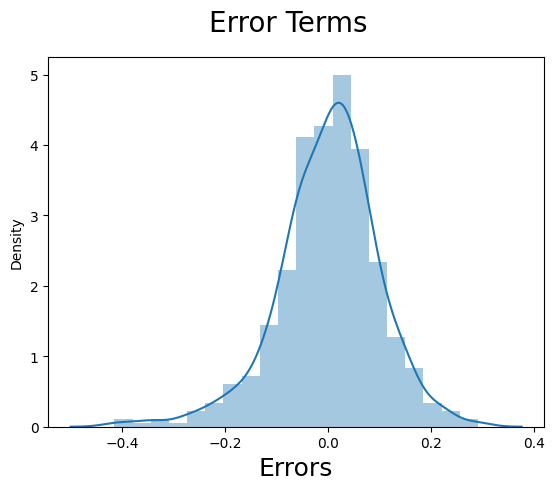

In [359]:
# Plot the distribution of errors

fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

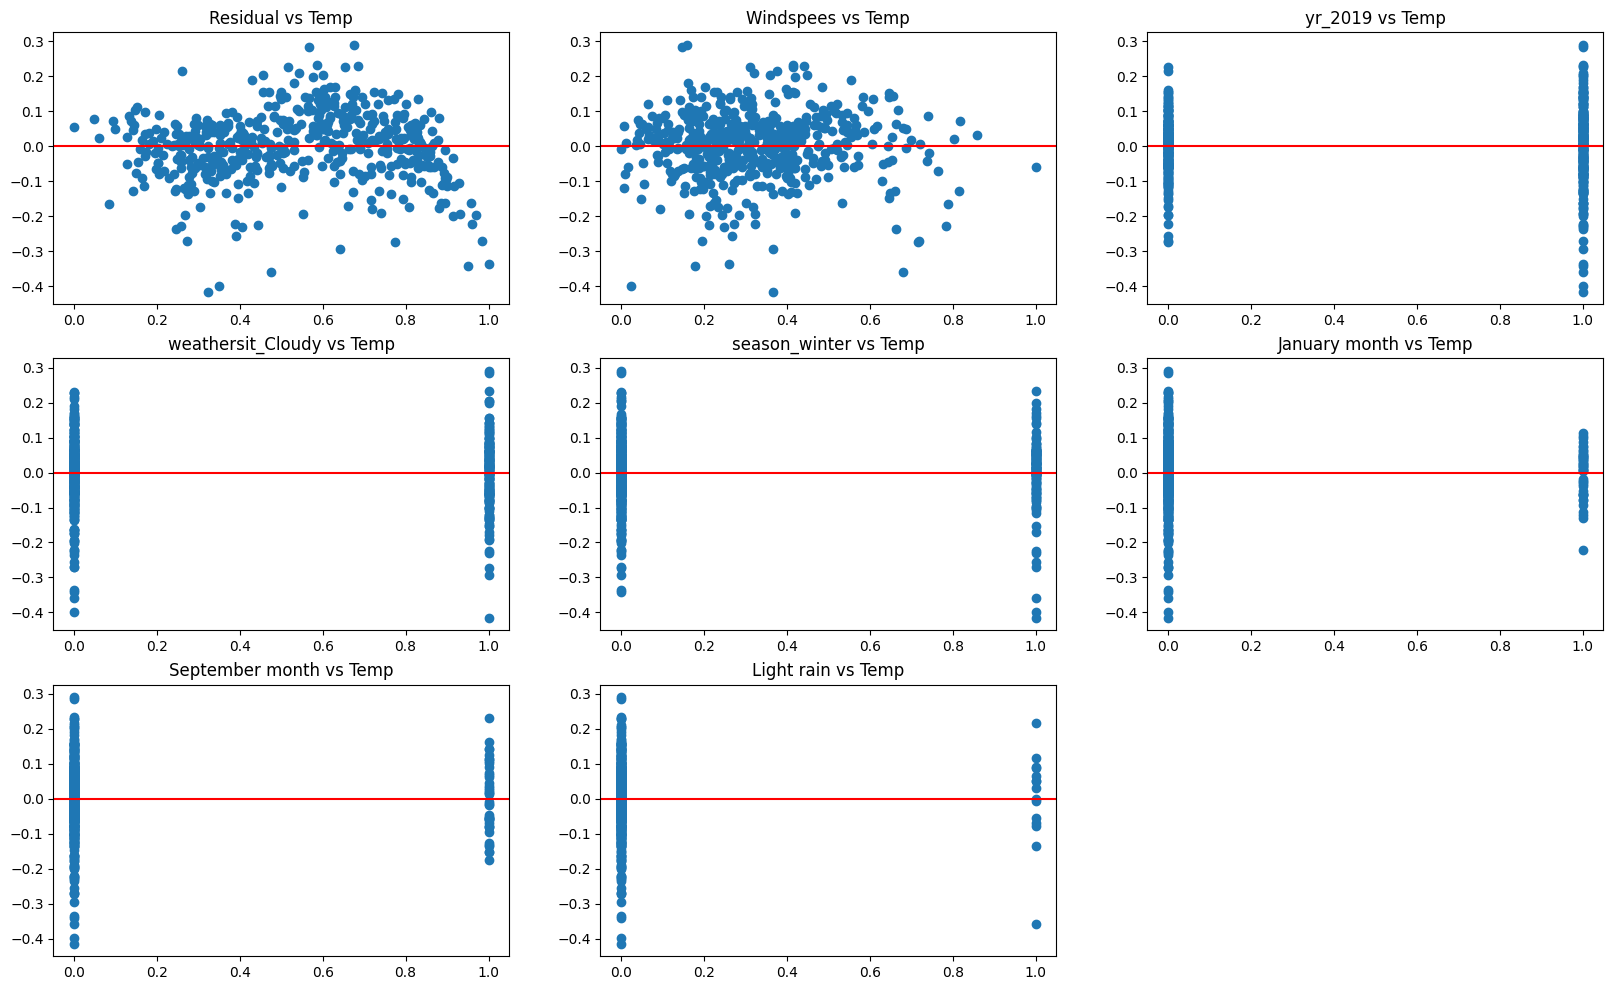

In [360]:
# Scatter Plot for all residuals, mostly all the means are centered at 0

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(X_train['temp'],res)
plt.title("Residual vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['windspeed'],res)
plt.title("Windspees vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['year_2019'],res)
plt.title("yr_2019 vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['weathersit_Cloudy'],res)
plt.title("weathersit_Cloudy vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['season_winter'],res)
plt.title("season_winter vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['month_Jan'],res)
plt.title("January month vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['month_Sep'],res)
plt.title("September month vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,8)
plt.scatter(X_train['weathersit_Light Rain'],res)
plt.title("Light rain vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

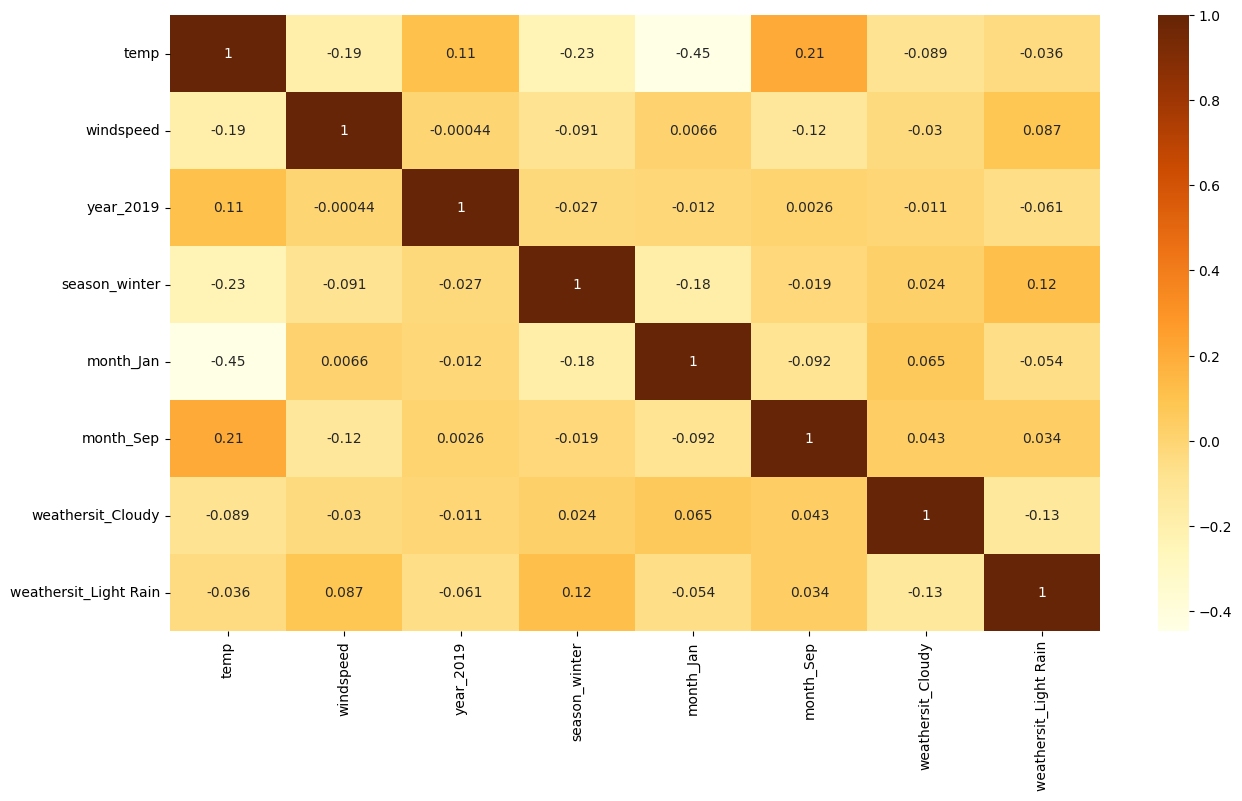

In [377]:
# Check for multi-Colinearity

X_train_sm.drop(['const'],axis=1,inplace=True) 

plt.figure(figsize=(15,8))
sns.heatmap(X_train_sm.corr(),annot = True, cmap="YlOrBr")
plt.show()

# Final Model Predictions

In [361]:
# Make the list of numerical variable need to be scaled

var_scale=['temp','atemp','humidity','windspeed','cnt']

# Scaled the created list's variables between 0-1

df_test[var_scale]=scaler.transform(df_test[var_scale]) 
df_test.head()

,temp,atemp,humidity,windspeed,cnt,year_2019,holiday_No_Holiday,workingday_Yes_w_day,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
535,0.901354,0.842587,0.610133,0.153728,0.712034,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [362]:
# Describe the df_test-dataset

df_test.describe()

,temp,atemp,humidity,windspeed,cnt,year_2019,holiday_No_Holiday,workingday_Yes_w_day,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.481818,0.963636,0.359091,0.254545,0.263636,...,0.086364,0.086364,0.154545,0.131818,0.172727,0.159091,0.118182,0.122727,0.318182,0.027273
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.500809,0.187620,0.480828,0.436599,0.441609,...,0.281541,0.281541,0.362295,0.339064,0.378873,0.366595,0.323559,0.328872,0.466833,0.163248
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [363]:
# Splitting test into X_test and y_test


y_test = df_test.pop('cnt')
X_test = df_test

In [364]:
X_col_new = X.columns
X_test = X_test[X_col_new]

In [365]:
# Adding constant variable to test dataframe

X_test_sm = sm.add_constant(X_test)

In [366]:
# Making predictions using the 7th model

y_pred_sm = lr.predict(X_test_sm)

In [367]:
# Calculating R-squared value for the test datase

r_squared = r2_score(y_test,y_pred_sm)
r_squared

0.7673405566500336

Text(0, 0.5, 'y_pred_sm')

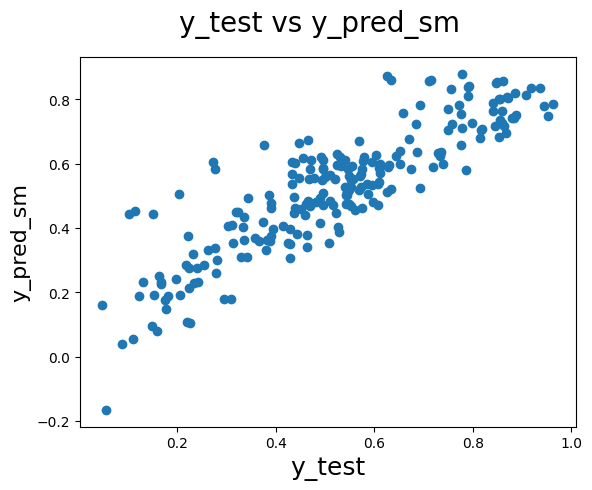

In [368]:
# Plotting y_test and y_pred_sm to understand the spread


fig = plt.figure()
plt.scatter(y_test, y_pred_sm)
fig.suptitle('y_test vs y_pred_sm', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred_sm', fontsize = 16) 

In [369]:
round(lr.params,4)

const                    0.1789
temp                     0.5163
windspeed               -0.1528
year_2019                0.2348
season_winter            0.0845
month_Jan               -0.0823
month_Sep                0.0706
weathersit_Cloudy       -0.0700
weathersit_Light Rain   -0.2814
dtype: float64

In [370]:
# Calculating Adjusted-Rsquared value for the test dataset

adjusted_r2 = round(1-(1-r_squared)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7585


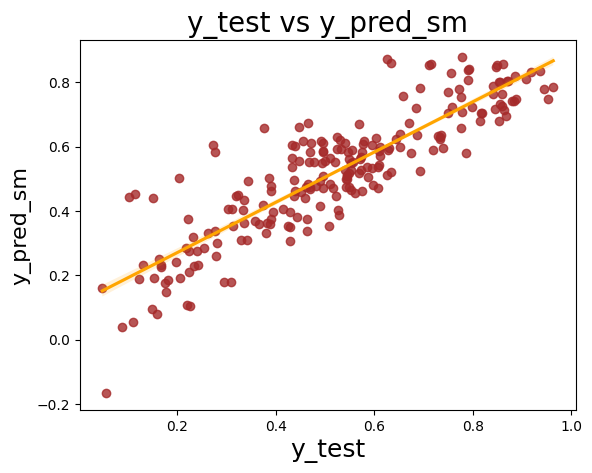

In [371]:
# Visualizing the fit on the test data by plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred_sm, ci=65, fit_reg=True,scatter_kws={"color": "brown"}, line_kws={"color": "orange"})
plt.title('y_test vs y_pred_sm', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred_sm', fontsize=16)
plt.show()